<a href="https://colab.research.google.com/github/19PA1A0536/Plant_Disease/blob/master/Mobilenet_SSD_V2_TF2_Drive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import glob
import xml.etree.ElementTree as ET
import pandas as pd
import tensorflow as tf

In [ ]:
!git clone --q https://github.com/tensorflow/models.git

In [ ]:
# navigate to /models/research folder to compile protos

%cd models/research

/content/models/research


In [ ]:
# Compile protos.

!protoc object_detection/protos/*.proto --python_out=.

In [ ]:
# Install TensorFlow Object Detection API.

!cp object_detection/packages/tf2/setup.py .
!python -m pip install .


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/models/research
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.1/352.1 KB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 95.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 64.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 KB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 114.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.4/662.4 KB 59.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 KB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB

In [ ]:
#!python object_detection/builders/model_builder_tf2_test.py

In [ ]:
%cd /content

/content


In [ ]:
%mkdir data

In [ ]:
cd data

/content/data


In [ ]:
!curl -L "https://universe.roboflow.com/ds/5jM5409eQU?key=SalnpoiGwN" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   896  100   896    0     0   3964      0 --:--:-- --:--:-- --:--:--  3964
100 74.9M  100 74.9M    0     0  88.3M      0 --:--:-- --:--:-- --:--:-- 88.3M
Archive:  roboflow.zip
 extracting: train/leaves.tfrecord   
 extracting: train/leaves_label_map.pbtxt  
 extracting: test/leaves.tfrecord    
 extracting: test/leaves_label_map.pbtxt  
 extracting: README.roboflow.txt     
 extracting: README.dataset.txt      


In [ ]:
ls

README.dataset.txt  README.roboflow.txt  test/  train/


In [ ]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

--2023-03-02 09:57:15--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 108.177.98.128, 2607:f8b0:400e:c06::80
Connecting to download.tensorflow.org (download.tensorflow.org)|108.177.98.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  --.-KB/s    in 0.1s    

2023-03-02 09:57:15 (152 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]



In [ ]:
!tar -xzvf ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


In [ ]:
#mount drive

from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
cd /content/gdrive/MyDrive/PlantDoc

/content/gdrive/MyDrive/PlantDoc


In [ ]:
#!unzip /content/gdrive/MyDrive/PlantDoc/trained-checkpoint.zip

In [ ]:
#!unzip /content/gdrive/MyDrive/PlantDoc/exported-model.zip

In [ ]:
#mkdir /content/data/trained-checkpoint

In [ ]:
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


Replace /content/data/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config with https://github.com/bhargav23/Plant-disease-detection/blob/main/pipeline.config

In [ ]:
!python /content/models/research/object_detection/model_main_tf2.py \
  --pipeline_config_path=/content/gdrive/MyDrive/PlantDoc/pipeline.config \
  --model_dir=/content/gdrive/MyDrive/PlantDoc/trained-checkpoint \
  --alsologtostderr

2023-03-02 06:26:47.563709: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-02 06:26:47.563813: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-02 06:26:47.563831: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
2023-03-02 06:26:52.217628: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environme

In [ ]:
mkdir /content/gdrive/MyDrive/PlantDoc/exported-model

In [ ]:
!python /content/models/research/object_detection/export_tflite_graph_tf2.py \
    --trained_checkpoint_dir=/content/gdrive/MyDrive/PlantDoc/trained-checkpoint \
    --pipeline_config_path=/content/gdrive/MyDrive/PlantDoc/pipeline.config \
    --output_directory /content/gdrive/MyDrive/PlantDoc/exported-model

2023-03-02 09:59:10.638798: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-02 09:59:10.638897: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-02 09:59:10.638915: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
2023-03-02 09:59:17.607539: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environme

In [ ]:
mkdir '/content/gdrive/MyDrive/PlantDoc/tflite'

In [ ]:
cd '/content/gdrive/MyDrive/PlantDoc/tflite'

[Errno 2] No such file or directory: '/content/gdrive/MyDrive/PlantDoc/tflite'
/content


In [ ]:
#mount drive

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import tensorflow as tf

# Set the path to the saved model directory
saved_model_dir = '/content/gdrive/MyDrive/PlantDoc/exported-model/saved_model'

# Create a converter object
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)

# Apply optimizations (optional)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Convert the model
tflite_model = converter.convert()

# Save the TensorFlow Lite model
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

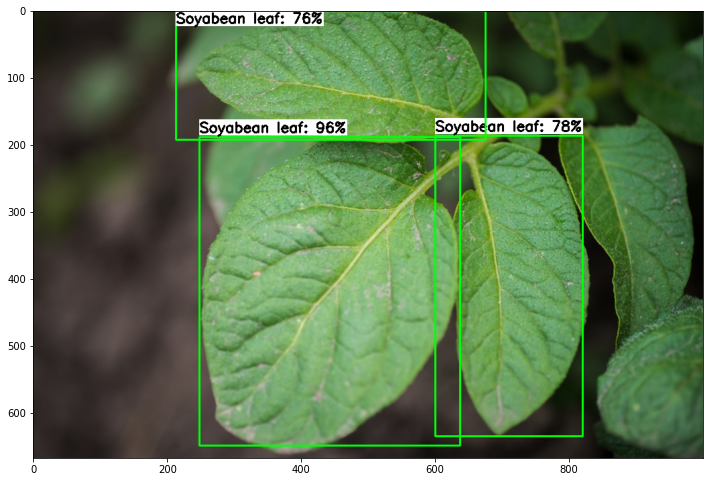

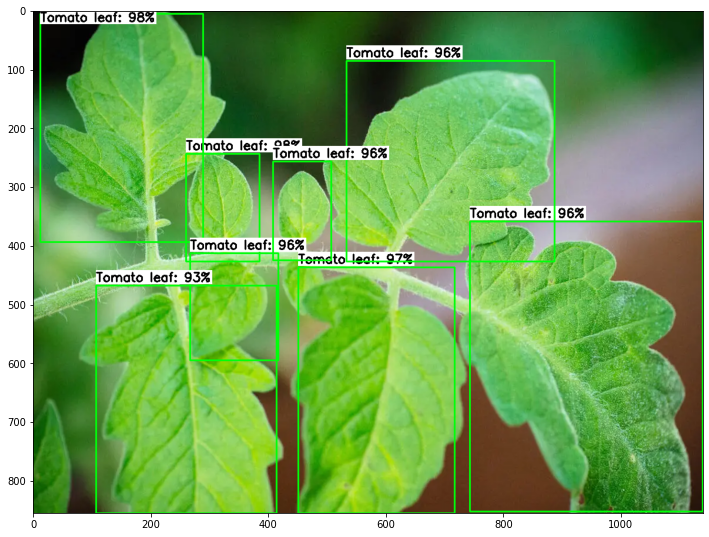

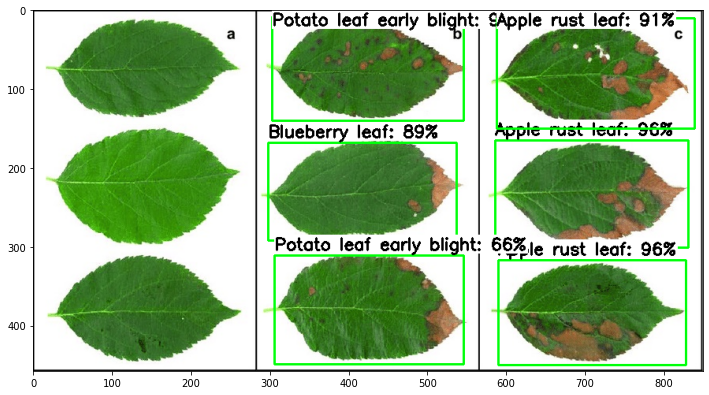

In [ ]:
# Set up variables for running user's model
PATH_TO_IMAGES='/content/gdrive/MyDrive/PlantDoc/tflite'   # Path to test images folder
PATH_TO_MODEL='/content/gdrive/MyDrive/PlantDoc/tflite/detect.tflite'   # Path to .tflite model file
PATH_TO_LABELS='/content/gdrive/MyDrive/PlantDoc/tflite/labelmap.txt'   # Path to labelmap.txt file
min_conf_threshold=0.5   # Confidence threshold (try changing this to 0.01 if you don't see any detection results)
images_to_test = 3   # Number of images to run detection on

# Run inferencing function!
tflite_detect_images(PATH_TO_MODEL, PATH_TO_IMAGES, PATH_TO_LABELS, min_conf_threshold, images_to_test)